Задание 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']
X = pd.DataFrame(data,columns = boston['feature_names'])
y = pd.DataFrame(target,columns = ['price'])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


In [7]:
tsne =TSNE(n_components=2 ,learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

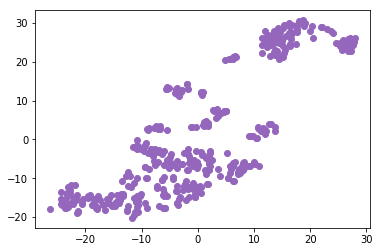

In [10]:
plt.scatter(X_train_tsne[:, 0],X_train_tsne[:, 1],c = '#9467bd')
plt.show()

Задание 2

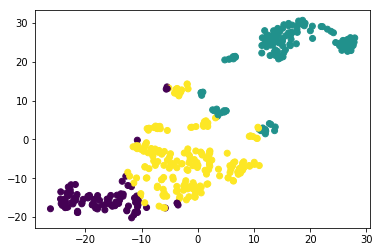

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [72]:
price_mean_0 = y_train[labels_train == 0].mean()
price_mean_1 = y_train[labels_train == 1].mean()
price_mean_2 = y_train[labels_train == 2].mean()
CRIM_mean_0 = X_train.loc[labels_train == 0,'CRIM'].mean()
CRIM_mean_1 = X_train.loc[labels_train == 1,'CRIM'].mean()
CRIM_mean_2 = X_train.loc[labels_train == 2,'CRIM'].mean()
print('price:','\n',price_mean_0 , price_mean_1,price_mean_2,'\n','CRIM','\n',CRIM_mean_0,'\n',CRIM_mean_1,'\n',CRIM_mean_2)

price: 
 price    27.788372
dtype: float64 price    16.165354
dtype: float64 price    24.958115
dtype: float64 
 CRIM 
 0.07356558139534886 
 10.797028425196853 
 0.42166020942408367


Задание 3

In [64]:
labels_test = kmeans.fit_predict(X_test_scaled)
print('Test Claster 0: {}'.format(y_test[labels_test == 0].mean()))
print('Test Claster 1: {}'.format(y_test[labels_test == 1].mean()))
print('Test Claster 2: {}'.format(y_test[labels_test == 2].mean()))
print('Test Claster CRIM 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Test Claster CRIM 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Test Claster CRIM 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Test Claster 0: price    33.871429
dtype: float64
Test Claster 1: price    21.55283
dtype: float64
Test Claster 2: price    16.437143
dtype: float64
Test Claster CRIM 0: 0.08618571428571427
Test Claster CRIM 1: 0.25200716981132076
Test Claster CRIM 2: 10.165531142857143
